In [1]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW
from tqdm import tqdm

# Prevent TensorFlow import issues
os.environ["TRANSFORMERS_NO_TF"] = "1"


In [6]:
# Load your dataset
df = pd.read_csv(r"C:\Users\sajal\Desktop\NLP Project_updated\Intent_Classification_Dataset__5000_entries_.csv").dropna()

# Encode labels
label_encoder = LabelEncoder()
df['label_id'] = label_encoder.fit_transform(df['label'])

label2id = {label: int(idx) for label, idx in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}
id2label = {int(idx): label for label, idx in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

# Train-validation split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'].tolist(), df['label_id'].tolist(), test_size=0.2, random_state=42
)


In [7]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class IntentDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
        self.labels = torch.tensor(labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

# Create Dataset objects
train_dataset = IntentDataset(train_texts, train_labels)
val_dataset = IntentDataset(val_texts, val_labels)


In [8]:
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [9]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

optimizer = AdamW(model.parameters(), lr=2e-5)



🚀 Epoch 1/4


Training: 100%|██████████| 250/250 [00:19<00:00, 13.16it/s]


✅ Avg Training Loss: 0.0006


Validating: 100%|██████████| 63/63 [00:00<00:00, 66.61it/s]


🔍 Validation Loss     : 0.0004
🎯 Accuracy            : 1.0000
🧪 Precision (weighted): 1.0000
🔁 Recall (weighted)   : 1.0000
📈 F1 Score (weighted) : 1.0000
💾 Best model saved (F1: 1.0000)

🚀 Epoch 2/4


Training: 100%|██████████| 250/250 [00:17<00:00, 14.09it/s]


✅ Avg Training Loss: 0.0005


Validating: 100%|██████████| 63/63 [00:00<00:00, 71.68it/s]


🔍 Validation Loss     : 0.0003
🎯 Accuracy            : 1.0000
🧪 Precision (weighted): 1.0000
🔁 Recall (weighted)   : 1.0000
📈 F1 Score (weighted) : 1.0000

🚀 Epoch 3/4


Training: 100%|██████████| 250/250 [00:18<00:00, 13.64it/s]


✅ Avg Training Loss: 0.0004


Validating: 100%|██████████| 63/63 [00:00<00:00, 67.86it/s]


🔍 Validation Loss     : 0.0003
🎯 Accuracy            : 1.0000
🧪 Precision (weighted): 1.0000
🔁 Recall (weighted)   : 1.0000
📈 F1 Score (weighted) : 1.0000

🚀 Epoch 4/4


Training: 100%|██████████| 250/250 [00:18<00:00, 13.76it/s]


✅ Avg Training Loss: 0.0003


Validating: 100%|██████████| 63/63 [00:00<00:00, 68.67it/s]


🔍 Validation Loss     : 0.0002
🎯 Accuracy            : 1.0000
🧪 Precision (weighted): 1.0000
🔁 Recall (weighted)   : 1.0000
📈 F1 Score (weighted) : 1.0000


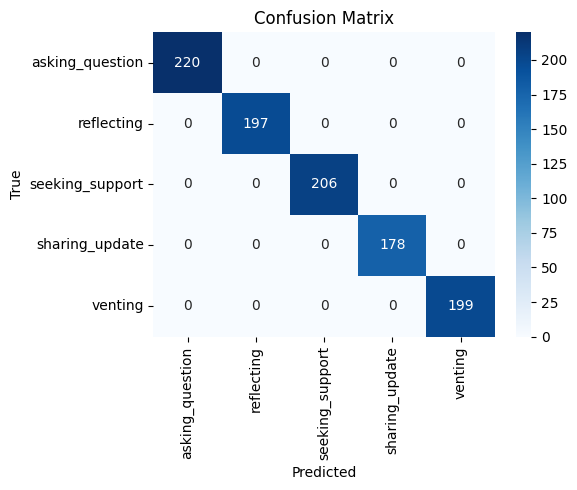


📋 Classification Report:
                 precision    recall  f1-score   support

asking_question       1.00      1.00      1.00       220
     reflecting       1.00      1.00      1.00       197
seeking_support       1.00      1.00      1.00       206
 sharing_update       1.00      1.00      1.00       178
        venting       1.00      1.00      1.00       199

       accuracy                           1.00      1000
      macro avg       1.00      1.00      1.00      1000
   weighted avg       1.00      1.00      1.00      1000



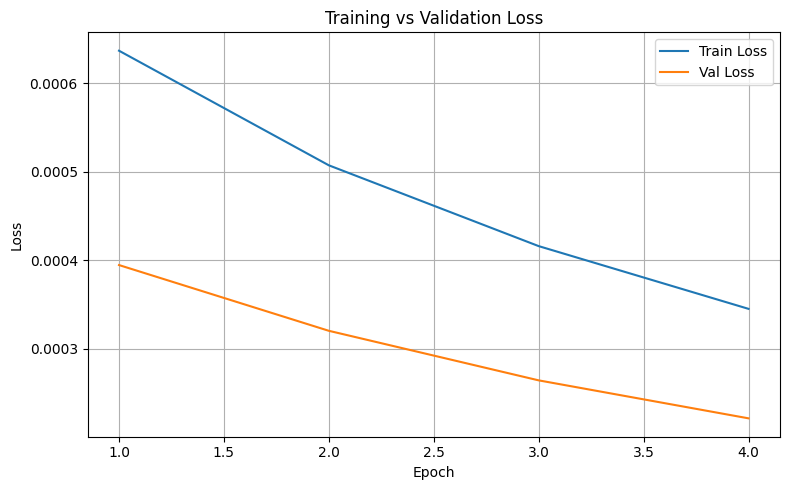


📊 Per-Class Accuracy:
asking_question   : 1.0000
reflecting        : 1.0000
seeking_support   : 1.0000
sharing_update    : 1.0000
venting           : 1.0000


In [12]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# === Training Config ===
num_epochs = 4
best_val_f1 = 0
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    print(f"\n🚀 Epoch {epoch+1}/{num_epochs}")
    model.train()
    total_train_loss = 0

    for batch in tqdm(train_loader, desc="Training"):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"✅ Avg Training Loss: {avg_train_loss:.4f}")

    # === Validation ===
    model.eval()
    total_val_loss = 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validating"):
            batch = {k: v.to(device) for k, v in batch.items()}
            labels = batch["labels"]
            outputs = model(**batch)
            loss = outputs.loss
            total_val_loss += loss.item()

            preds = torch.argmax(outputs.logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    acc = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average="weighted")

    print(f"🔍 Validation Loss     : {avg_val_loss:.4f}")
    print(f"🎯 Accuracy            : {acc:.4f}")
    print(f"🧪 Precision (weighted): {precision:.4f}")
    print(f"🔁 Recall (weighted)   : {recall:.4f}")
    print(f"📈 F1 Score (weighted) : {f1:.4f}")

    # === Save Best Model ===
    if f1 > best_val_f1:
        best_val_f1 = f1
        model.save_pretrained("./intent_classifier_bert_best")
        tokenizer.save_pretrained("./intent_classifier_bert_best")
        print(f"💾 Best model saved (F1: {f1:.4f})")

# === After Training: Evaluation ===

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
class_names = list(model.config.id2label.values())

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

# Train vs Val Loss Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Val Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Per-Class Accuracy
labels_np = np.array(all_labels)
preds_np = np.array(all_preds)
print("\n📊 Per-Class Accuracy:")
for i, label in enumerate(class_names):
    mask = labels_np == i
    class_acc = accuracy_score(labels_np[mask], preds_np[mask])
    print(f"{label:<18}: {class_acc:.4f}")
